# Drug sales: regression project

I come from multiple natural science disciplinary background. During my time of studies, I had been exposed to many fields and domain, including, but not limited to, pharmaceuticals, biochemistry and physics. Learning the pharmacology, pharmacokinetic and pharmacodynamic, I've develop interest in this domain not just at a deep understanding level but, at the financial level aswell. I choose to target two groups of drugs because they are arguably the most commonly used in day-to-day life.

The goal for this project:
* Build regression models that can be used to predict future drug sales of:
    * N02BA - Analgesics and antipyretics, Salicylic acid and derivatives
    * N05B - Psycholeptics drugs, Anxiolytic drugs
* Apply regression machine learning algorithms:
    * Linear Regression
    * Polynomial Regression
    * SVR
    * Gradient boosting
    * Random Foresting Regression
 

# Background

The dataset is built from the initial dataset consisted of 600000 transactional data collected in 6 years (period 2014-2019), indicating date and time of sale, pharmaceutical drug brand name and sold quantity, exported from Point-of-Sale system in the individual pharmacy. Each abbreviation are group of drugs that are classified by Anatomical Therapeutic Chemical (ATC) Classification System. I will be targetting two different group of drugs; 'NO2BA' & 'N05B'.

* M01AB - Anti-inflammatory and antirheumatic products, non-steroids, Acetic acid derivatives and related substances
* M01AE - Anti-inflammatory and antirheumatic products, non-steroids, Propionic acid derivatives
* N02BA - Other analgesics and antipyretics, Salicylic acid and derivatives
* N02BE/B - Other analgesics and antipyretics, Pyrazolones and Anilides
* N05B - Psycholeptics drugs, Anxiolytic drugs
* N05C - Psycholeptics drugs, Hypnotics and sedatives drugs
* R03 - Drugs for obstructive airway diseases
* R06 - Antihistamines for systemic use

# Dataset 

This dataset was obtained from [Kaggle!](https://www.kaggle.com/milanzdravkovic/pharma-sales-data?select=salesdaily.csv) Please check out the link if you want to understand what each feature represents in detail. 

In [38]:
# Import necesssary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split 

# Importing csv file
drug = pd.read_csv('salesweekly.csv')

In [39]:
drug.head(3)

,datum,M01AB,M01AE,N02BA,N02BE,N05B,N05C,R03,R06
0,1/5/2014,14.00,11.67,21.3,185.95,41.0,0.0,32.0,7.0
1,1/12/2014,29.33,12.68,37.9,190.70,88.0,5.0,21.0,7.2
2,1/19/2014,30.67,26.34,45.9,218.40,80.0,8.0,29.0,12.0


Each columns are different **group of drugs with some similarities** . At each row are the volumns of sales for the specific week. I will be only focusing on two different classes of drugs and predicting their sales.

In [40]:
drug.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 302 entries, 0 to 301
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   datum   302 non-null    object 
 1   M01AB   302 non-null    float64
 2   M01AE   302 non-null    float64
 3   N02BA   302 non-null    float64
 4   N02BE   302 non-null    float64
 5   N05B    302 non-null    float64
 6   N05C    302 non-null    float64
 7   R03     302 non-null    float64
 8   R06     302 non-null    float64
dtypes: float64(8), object(1)
memory usage: 21.4+ KB


There is no missing data and all the data type are of numerics except for the date-time column.

In [41]:
drug.describe()

,M01AB,M01AE,N02BA,N02BE,N05B,N05C,R03,R06
count,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,35.102441,27.167611,27.060295,208.627161,61.740853,4.138935,38.439811,20.224561
std,8.617106,7.043491,8.086458,76.069221,22.436970,3.129265,22.900873,11.381464
min,7.670000,6.237000,3.500000,86.250000,18.000000,0.000000,2.000000,1.000000
25%,29.387500,22.387500,21.300000,149.300000,47.000000,2.000000,21.000000,11.475000
50%,34.565000,26.789500,26.500000,198.300000,57.000000,3.979167,35.000000,17.500000
75%,40.175000,31.046500,32.475000,252.471500,71.000000,6.000000,51.000000,26.000000
max,65.330000,53.571000,60.125000,546.899000,154.000000,17.000000,131.000000,65.000000


Looks like certain group of drugs on average have higher amount of sales. 

# EDA

[Text(0.5, 1, 'Feature Correlation')]

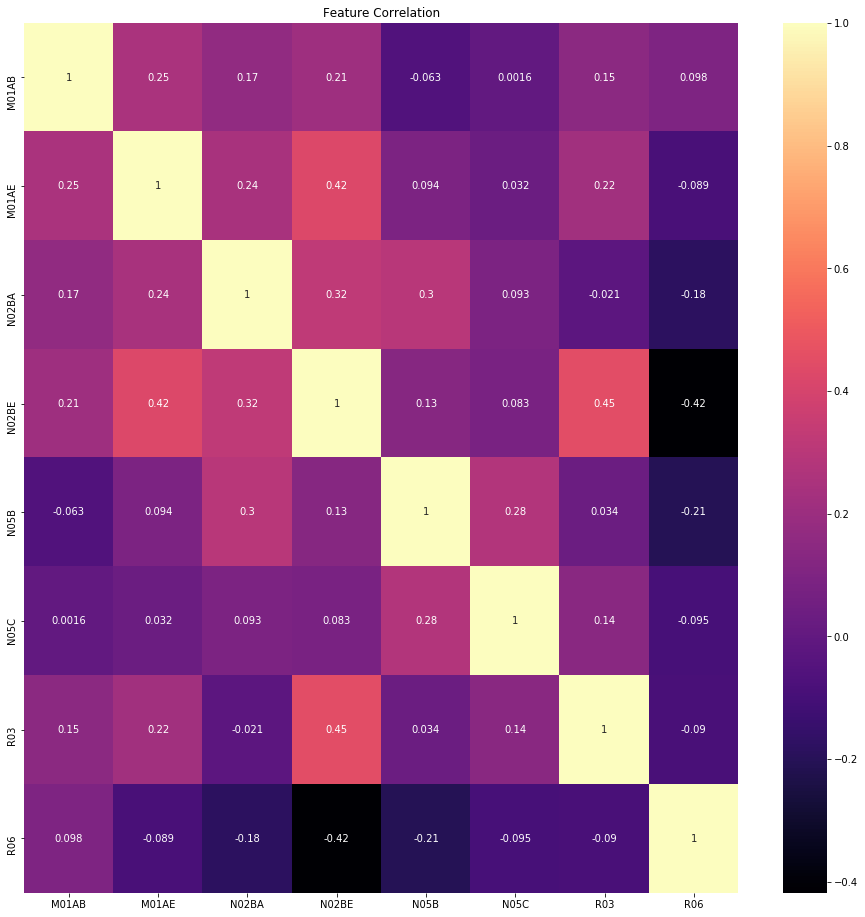

In [42]:
# Setting up figure size for heatmap
fig, ax = plt.subplots(figsize=(16,16)) 
sns.heatmap(drug.corr(), annot=True, ax=ax, cmap='magma').set(title = 'Feature Correlation')

In [43]:
drug.corr()['N02BA'].sort_values()

R06     -0.184593
R03     -0.021493
N05C     0.092970
M01AB    0.165271
M01AE    0.241872
N05B     0.300877
N02BE    0.324098
N02BA    1.000000
Name: N02BA, dtype: float64

In [44]:
drug.corr()['N05B'].sort_values()

R06     -0.205082
M01AB   -0.062916
R03      0.034152
M01AE    0.094238
N02BE    0.127111
N05C     0.279640
N02BA    0.300877
N05B     1.000000
Name: N05B, dtype: float64

There seems to be no strong negative or positive correlations with the two group of drugs that I am targetting. However, there seem to be some corrleation with other classes of drugs that one may want to explore;
* M01AB - M01AE
* M01AE - N02BE
* N02BA - N02BE
* N02BE - R03
* N05B - N05C

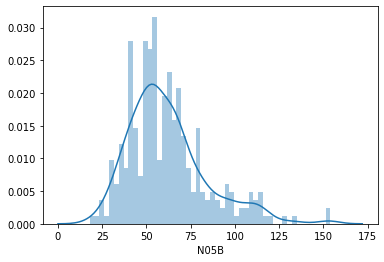

In [45]:
sns.distplot(drug['N05B'],bins=50)

In [49]:
300/302

0.9933774834437086

Looking at the distribution, there's are small outliers that I plan on dropping (2 time stamps). Knowing there is 302 enteries, dropping 2 will still retain 99.34% of the original dataset.

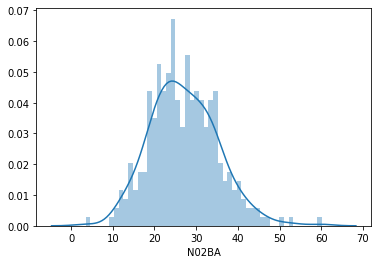

In [46]:
sns.distplot(drug['N02BA'], bins=50)

I will be dropping 2 of the highest enteries as-well

# Model preprocessing

### Creating two group of drugs dataset

In [55]:
# Renaming 'datum' to 'Date'
drug.rename(columns={'datum':'Date'}, inplace=True)

# Converting object datatype to datetime
drug['Date'] = pd.to_datetime(drug['Date'])

# Creating two datasets
drug_N02BA = drug[['Date','N02BA']]
drug_N05B = drug[['Date','N05B']]

In [57]:
drug_N02BA = drug_N02BA.sort_values('N02BA', ascending=False).iloc[2:]
drug_N02B = drug_N05B.sort_values('N05B', ascending=False).iloc[2:]

### Data preparation for N02BA

In [59]:
# Splitting N02BA to train and test set
train_n02ba, test_n02ba = train_test_split(drug_N02BA, test_size=0.3)

# Sorting based on date 
train_n02ba_sorted = train_n02ba.sort_values('Date', ascending=True)
test_n02ba_sorted = test_n02ba.sort_values('Date', ascending=True)

# Resetting index. Using index as X instead of date time to avoid confusion 
train_n02ba_sorted.reset_index(inplace=True, drop=True )
test_n02ba_sorted.reset_index(inplace=True, drop=True)

# Create test and training set of both X and Y
X_train_n02ba = train_n02ba_sorted.index
y_train_n02ba = train_n02ba_sorted['N02BA']
X_test_n02ba = test_n02ba_sorted.index
y_test_n02ba = test_n02ba_sorted['N02BA']

### Data preparation for N05B

In [60]:
train_n05b, test_n05b = train_test_split(drug_N05B, test_size=0.3)

train_n05b_sorted = train_n05b.sort_values('Date', ascending=True)
test_n05b_sorted = test_n05b.sort_values('Date', ascending=True)

train_n05b_sorted.reset_index(inplace=True)
test_n05b_sorted.reset_index(inplace=True)

train_n05b_sorted.drop('index', axis=1, inplace=True)
test_n05b_sorted.drop('index', axis=1, inplace=True)

X_train_n05b = train_n05b_sorted.index
y_train_n05b = train_n05b_sorted['N05B']
X_test_n05b = test_n05b_sorted.index
y_test_n05b = test_n05b_sorted['N05B']

### Visualizing N02BA training dataset 

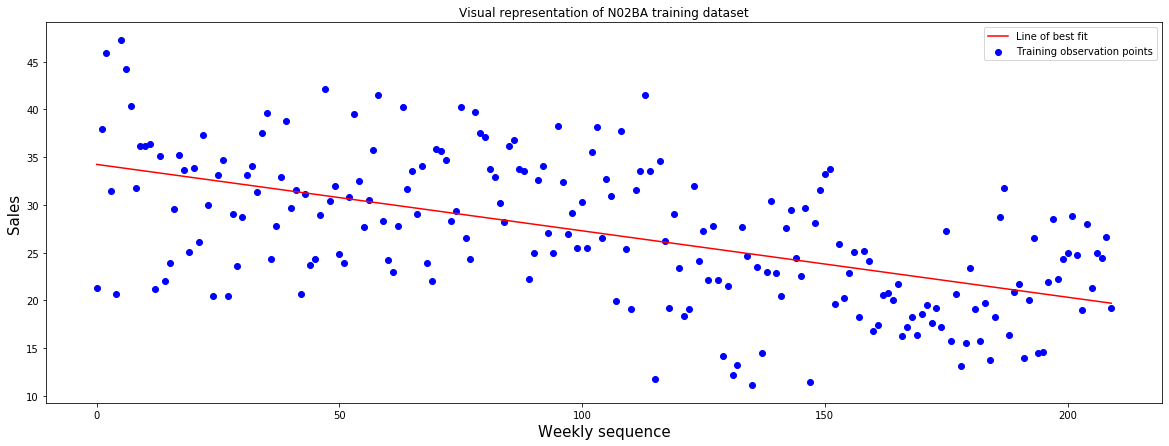

In [61]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()

# Reshaping all datasets for Y and X
X_train_N02BA = X_train_n02ba.values.reshape(-1, 1)
X_test_N02BA = X_test_n02ba.values.reshape(-1, 1)
y_train_N02BA = y_train_n02ba.values.reshape(-1, 1)
y_test_N02BA = y_test_n02ba.values.reshape(-1, 1)

# Fitting model based on X and Y train sets
reg.fit(X_train_N02BA, y_train_N02BA)

# Creating figure 
plt.subplots(figsize=(20,7))
plt.title('Visual representation of N02BA training dataset')
plt.xlabel('Weekly sequence', fontsize=15)
plt.ylabel('Sales', fontsize=15)
plt.scatter(X_train_N02BA, y_train_N02BA, color='blue', label='Training observation points')
plt.plot(X_train_N02BA, reg.predict(X_train_N02BA), color='red', label='Line of best fit')
plt.legend()

### Visualizing N02BA training dataset 

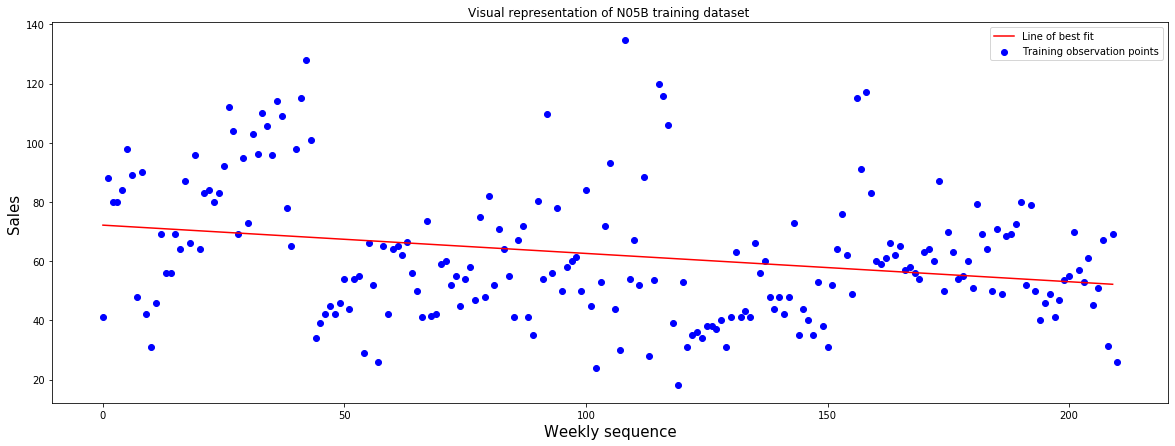

In [62]:
reg = LinearRegression()

X_train_N05B = X_train_n05b.values.reshape(-1, 1)
X_test_N05B = X_test_n05b.values.reshape(-1, 1)
y_train_N05B = y_train_n05b.values.reshape(-1, 1)
y_test_N05B = y_test_n05b.values.reshape(-1, 1)

reg.fit(X_train_N05B, y_train_N05B)

plt.subplots(figsize=(20,7))
plt.title('Visual representation of N05B training dataset ')
plt.xlabel('Weekly sequence', fontsize=15)
plt.ylabel('Sales', fontsize=15)
plt.scatter(X_train_N05B, y_train_N05B, color='blue', label='Training observation points')
plt.plot(X_train_N02BA, reg.predict(X_train_N02BA), color='red', label='Line of best fit')
plt.legend()

# Model building (baseline)

I will be build models based on N02BA to find the best models and then apply those models on N05B using default parameters. The following models used and their respective RMSE are:
* Linear Regression (23.74)
* Polynomial Regression 
* Support vector ression (32.28)
* Random forest regression (25.41)
* Gradient boosting (24.96)

In [63]:
# Importing necessary libraries
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [64]:
# Creating model instance and performing cross validation
lr = LinearRegression()

crs = cross_val_score(lr, X_train_N02BA , y_train_N02BA, cv=5, scoring='neg_root_mean_squared_error')
print('Average:', crs.mean())

Average: -6.332775592744275


In [65]:
sv = SVR()

crs = cross_val_score(sv, X_train_N02BA , y_train_N02BA.ravel(), cv=5, scoring='neg_root_mean_squared_error')
print('Average:', crs.mean())

Average: -6.383504845042337


In [66]:
rf = RandomForestRegressor()

crs = cross_val_score(rf, X_train_N02BA , y_train_N02BA.ravel(), cv=5, scoring='neg_root_mean_squared_error')
print('Average:', crs.mean())

Average: -7.236729667758453


In [67]:
gb = GradientBoostingRegressor()

crs = cross_val_score(gb, X_train_N02BA , y_train_N02BA.ravel(), cv=5, scoring='neg_root_mean_squared_error')
print('Average:', crs.mean())

Average: -7.320765014168648


I have decided to use all of the algorithms except for SVR.

# Model evaluation on testset

In [68]:
# Importing necessary metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

### Linear Regression

MAE: 7.293130833972283
RMSE: 8.858731133765097
R2_Score: -0.15557217664389178


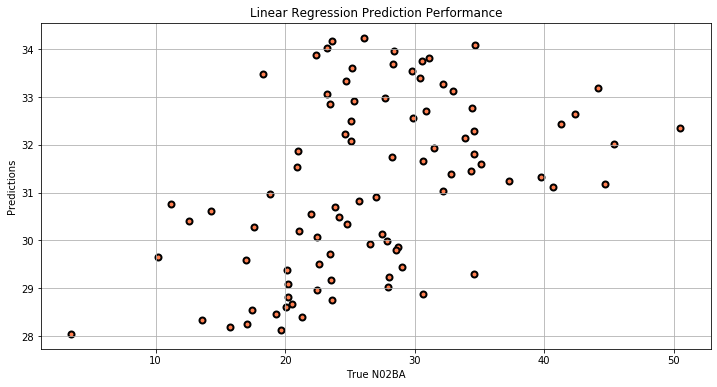

In [69]:
lr.fit(X_train_N02BA , y_train_N02BA)
lr_pre = lr.predict(X_test_N02BA)


print('MAE:', mean_absolute_error(y_test_N02BA, lr_pre))
print('RMSE:', np.sqrt(mean_squared_error(y_test_N02BA, lr_pre)))
print('R2_Score:', r2_score(y_test_N02BA, lr_pre))

fig = plt.figure(figsize=(12, 6))
plt.scatter(y_test_N02BA, lr_pre,color='coral', linewidths=2, edgecolors='k')
plt.xlabel('True N02BA') 
plt.ylabel('Predictions') 
plt.title('Linear Regression Prediction Performance') 
plt.grid()

### Polynomical Regression

MAE: 7.295522278509955
RMSE: 8.884277446269744
R2_Score: -0.16224653495490182


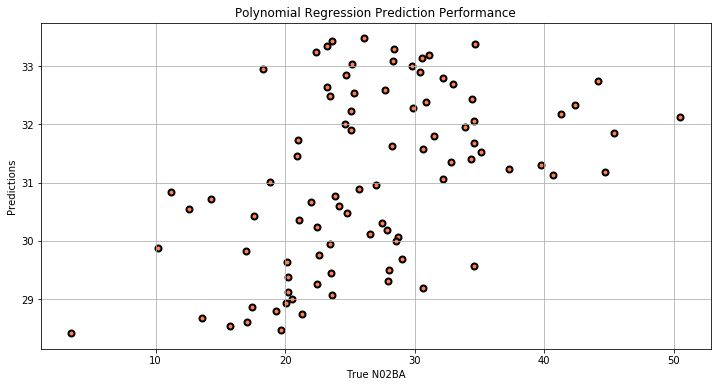

In [70]:
poly = PolynomialFeatures(degree = 2)
X_poly = poly.fit_transform(X_train_N02BA)
poly_reg_model = LinearRegression()
poly_reg_model.fit(X_poly, y_train_N02BA)

poly_pred = poly_reg_model.predict(poly.fit_transform(X_test_N02BA))

print('MAE:', mean_absolute_error(y_test_N02BA, poly_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test_N02BA, poly_pred)))
print('R2_Score:', r2_score(y_test_N02BA, poly_pred))

fig = plt.figure(figsize=(12, 6))
plt.scatter(y_test_N02BA, poly_pred,color='coral', linewidths=2, edgecolors='k')
plt.xlabel('True N02BA') 
plt.ylabel('Predictions') 
plt.title('Polynomial Regression Prediction Performance') 
plt.grid()

### Random Forest

MAE: 9.469800851777775
RMSE: 11.219106909746827
R2_Score: -0.8534061847417536


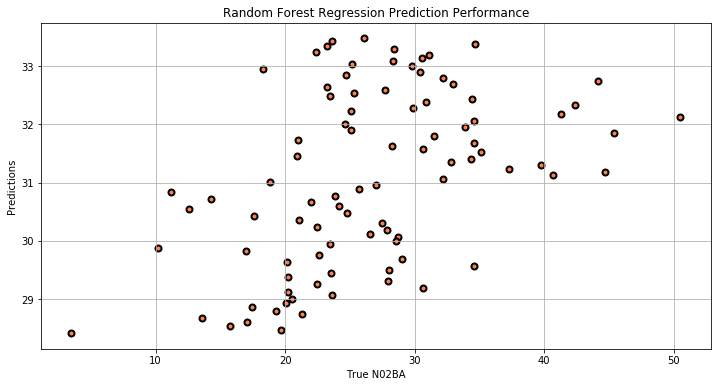

In [71]:
r = RandomForestRegressor()
r.fit(X_train_N02BA , y_train_N02BA.ravel())
r_pred = r.predict(X_test_N02BA)


print('MAE:', mean_absolute_error(y_test_N02BA, r_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test_N02BA, r_pred)))
print('R2_Score:', r2_score(y_test_N02BA, r_pred))

fig = plt.figure(figsize=(12, 6))
plt.scatter(y_test_N02BA, poly_pred,color='coral', linewidths=2, edgecolors='k')
plt.xlabel('True N02BA') 
plt.ylabel('Predictions') 
plt.title('Random Forest Regression Prediction Performance') 
plt.grid()

### Gradient boosting

MAE: 8.863084955172452
RMSE: 10.618968389918505
R2_Score: -0.6604228099834035


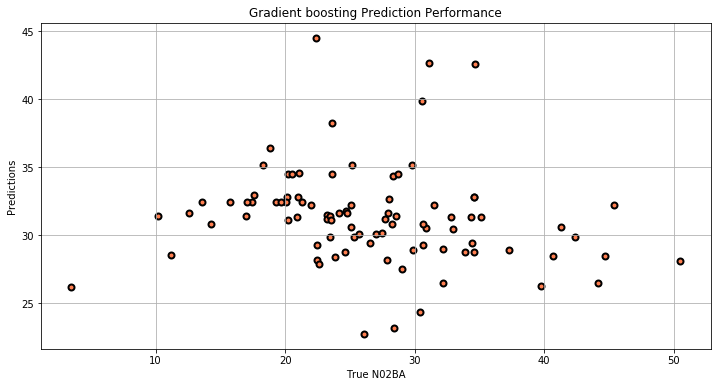

In [72]:
gb.fit(X_train_N02BA , y_train_N02BA.ravel())
gb_pred = gb.predict(X_test_N02BA)

print('MAE:', mean_absolute_error(y_test_N02BA, gb_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test_N02BA, gb_pred)))
print('R2_Score:', r2_score(y_test_N02BA, gb_pred))


fig = plt.figure(figsize=(12, 6))
plt.scatter(y_test_N02BA, gb_pred, color='coral', linewidths=2, edgecolors='k')
plt.xlabel('True N02BA') 
plt.ylabel('Predictions') 
plt.title('Gradient boosting Prediction Performance') 
plt.grid()

# Conclusion

The following final models used on the test dataset, N02BA, and their RMSE and R2 respectively are:
* Linear Regression (MAE: 7.29, RMSE: 8.86)
* Polynomial Regression (MAE: 7.30, RMSE: 8.88)
* Random Forest Ression (MAE: 9.47, RMSE: 11.22)
* Gradient boosting (MAE: 8.86, RMSE: 10.62) 

In general, models can be further improved by: 
* Model tuning, tuning the hyperparameters 
* Exploring seasonality 
* I could use smaller time interval